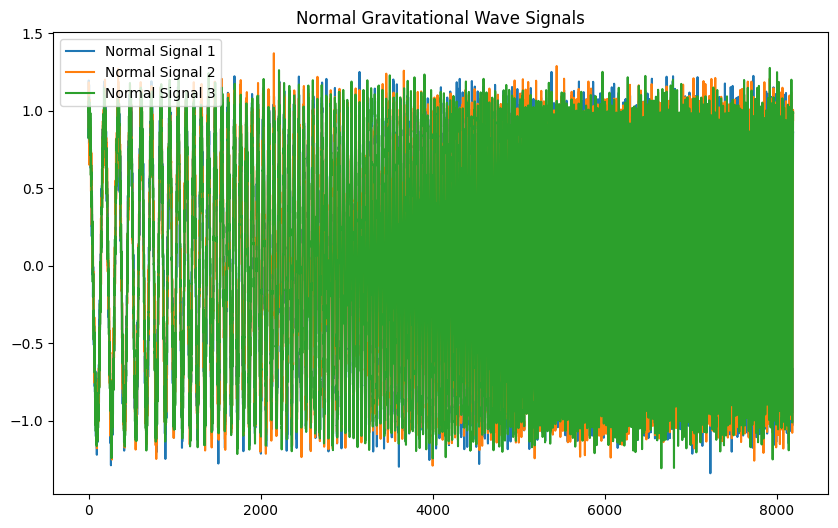

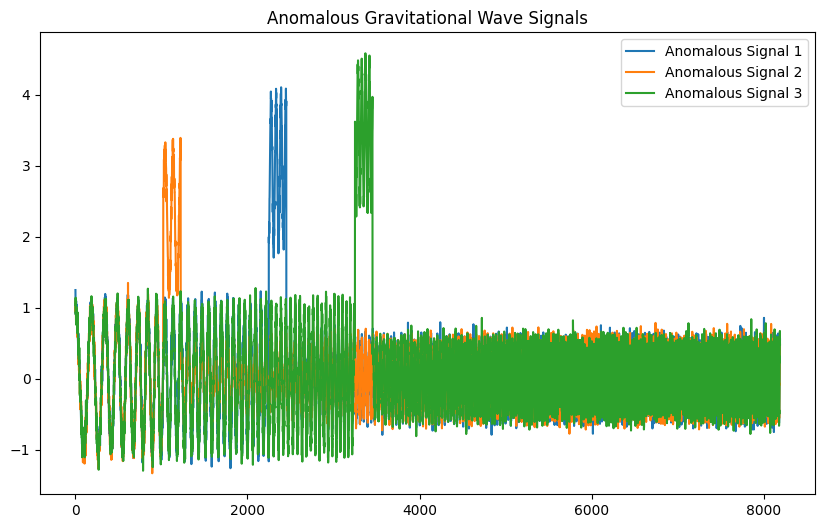

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

def generate_gravitational_wave_signal(duration, fs, anomaly=False):
    """
    Generate a synthetic gravitational wave signal.

    Parameters:
    - duration: Duration of the signal in seconds.
    - fs: Sampling rate in Hz.
    - anomaly: Whether to introduce an anomaly in the signal.

    Returns:
    - signal: The generated gravitational wave signal.
    """
    t = np.linspace(0, duration, int(duration * fs))
    # Creating a basic chirp signal that increases in frequency over time
    signal = chirp(t, f0=20, f1=200, t1=duration, method='linear')
    
    if anomaly:
        # Introduce an anomaly, e.g., a sudden spike or change in frequency
        anomaly_start = np.random.randint(int(0.2*fs), int(0.8*fs))
        signal[anomaly_start:anomaly_start+int(0.05*fs)] += np.random.uniform(2, 5)
        signal[anomaly_start+int(0.05*fs):] *= 0.5  # Decrease amplitude after the anomaly

    # Add some random noise to simulate real data
    noise = np.random.normal(0, 0.1, len(t))
    signal += noise

    return signal

def save_signals_as_npy(signals, filename):
    """
    Save the generated signals as a .npy file.

    Parameters:
    - signals: List of generated signals.
    - filename: Name of the file to save.
    """
    np.save(filename, np.array(signals))

# Parameters
duration = 1.0  # Signal duration in seconds
fs = 4096  # Sampling rate in Hz
num_samples = 50  # Number of samples for normal and anomalous signals

# Generate normal signals
normal_signals = [generate_gravitational_wave_signal(duration, fs, anomaly=False) for _ in range(num_samples)]

# Generate anomalous signals
anomalous_signals = [generate_gravitational_wave_signal(duration, fs, anomaly=True) for _ in range(num_samples)]

# Save the signals as .npy files
save_signals_as_npy(normal_signals, 'normal_gravitational_waves.npy')
save_signals_as_npy(anomalous_signals, 'anomalous_gravitational_waves.npy')

# Plot a few samples for visualization
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(normal_signals[i], label=f'Normal Signal {i+1}')
plt.title('Normal Gravitational Wave Signals')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(anomalous_signals[i], label=f'Anomalous Signal {i+1}')
plt.title('Anomalous Gravitational Wave Signals')
plt.legend()
plt.show()


In [4]:
from sklearn.decomposition import PCA

# Load the signals and labels
signals = np.load('anomalous_gravitational_waves.npy')

# Apply PCA to reduce dimensionality to 10 components
pca = PCA(n_components=10)
signals_reduced = pca.fit_transform(signals)

# Save the reduced signals
np.save('anamolous_gravitational_waves_signals_reduced.npy', signals_reduced)

# Show the shape of the reduced data
signals_reduced.shape


(50, 10)